In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier

# import custom modules
from custom_libs import db
from custom_libs import preprocessing
from custom_libs import classification
from custom_libs import plotting
from custom_libs import utils

## Loading del dataset e Preprocessing

In [2]:
df = db.get_dataset("McDonald_s_Reviews")
preprocessing.add_id_column(df, columns=["latitude", "longitude"])
preprocessing.add_rating_number_column(df)
df.head(2)


Number of unique ids:  39


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,rating_number,id
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,1,9.0
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,4,9.0


In [3]:
proprocessing_function = preprocessing.preprocess_text1
preprocessing.preprocess_dataframe(df, 'review', proprocessing_function)
df.head(2)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,rating_number,id,review_clean
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,1,9.0,look like someone spit food normal transaction...
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,4,9.0,far food atmosphere go staff make difference f...


## Sezione inerente alle Classificazioni

In [4]:
classification.append_sentiment_for_each_row(df, 'review_clean', new_column_name='sentiment')
df[['review_clean', 'sentiment']]

,review_clean,sentiment
0,look like someone spit food normal transaction...,Positive
1,far food atmosphere go staff make difference f...,Positive
2,made mobile got speaker checked line moving le...,Negative
3,mc crispy chicken sandwich customer service qu...,Neutral
4,repeat time drive thru still manage mess suppo...,Negative
...,...,...
33391,treated badly,Negative
33392,service good,Positive
33393,remove hunger enough,Negative
33394,good lately become expensive,Positive


In [5]:
X_sentiment = df[(df['sentiment'] == 'Positive')]
X_sentiment.head(2)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,rating_number,id,review_clean,sentiment
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,1,9.0,look like someone spit food normal transaction...,Positive
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,4,9.0,far food atmosphere go staff make difference f...,Positive


In [6]:
def plot_sentiment_word_clouds(df):
    for sentiment in classification.Sentiment.get_all():
        df_sentiment = df[(df['sentiment']==sentiment)]
        plotting.plot_word_cloud(df_sentiment, sentiment, 'review_clean')

# plot_sentiment_word_clouds(df)

In [13]:
def select_best_restaurant_from_stars(df, current_position, max_distance):
    points = utils.select_points_of_interest(df, current_position, max_distance)
    best_point = utils.get_restaurant_best_rated(points)
    return best_point


current_position = [30.460718, -97.792874]
best_point = select_best_restaurant_from_stars(df, current_position, max_distance=5)
best_point

,store_address,latitude,longitude
id,,,
9.0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874


In [8]:
X, y = df['review_clean'], df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
vectorizers = list()

vectorizers.append(CountVectorizer(stop_words='english'))
vectorizers.append(TfidfVectorizer())
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2)))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3)))

models = [PassiveAggressiveClassifier, MultinomialNB, SVC]

classification.test_classifiers(models, vectorizers, x_train, x_test, y_train, y_test)

Accuracy for PassiveAggressiveClassifier with vectorizer 0: 0.9276946107784431
Accuracy for PassiveAggressiveClassifier with vectorizer 1: 0.9392215568862275
Accuracy for PassiveAggressiveClassifier with vectorizer 2: 0.932185628742515
Accuracy for PassiveAggressiveClassifier with vectorizer 3: 0.9342814371257485
Accuracy for PassiveAggressiveClassifier with vectorizer 4: 0.9278443113772455


Accuracy for MultinomialNB with vectorizer 0: 0.8038922155688623
Accuracy for MultinomialNB with vectorizer 1: 0.7773952095808383
Accuracy for MultinomialNB with vectorizer 2: 0.7790419161676647
Accuracy for MultinomialNB with vectorizer 3: 0.7488023952095808
Accuracy for MultinomialNB with vectorizer 4: 0.7374251497005988


Accuracy for SVC with vectorizer 0: 0.9172155688622754
Accuracy for SVC with vectorizer 1: 0.9362275449101797
Accuracy for SVC with vectorizer 2: 0.9353293413173652
Accuracy for SVC with vectorizer 3: 0.9191616766467066
Accuracy for SVC with vectorizer 4: 0.9035928143712575




Accuracy: 0.9395209580838323
Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.90      0.91      1663
     Neutral       0.89      0.94      0.91      1251
    Positive       0.96      0.96      0.96      3766

    accuracy                           0.94      6680
   macro avg       0.93      0.93      0.93      6680
weighted avg       0.94      0.94      0.94      6680

Confusion matrix, without normalization


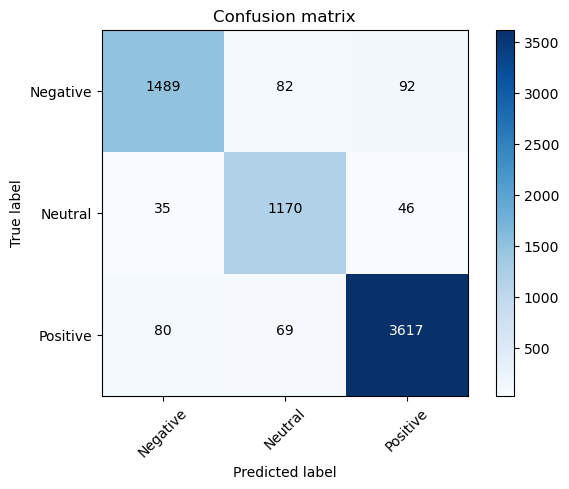

In [12]:
# Best combination of model and vectorizer
class_names = classification.Sentiment.get_all()

vectorizer = TfidfVectorizer()
x_train_trasformed = vectorizer.fit_transform(x_train)
x_test_trasformed = vectorizer.transform(x_test)

model = classification.test_classifier(PassiveAggressiveClassifier, x_train_trasformed, x_test_trasformed, y_train, y_test, class_names)

In [11]:
reviews = [
    "This restaurant has excellent service and delicious food.",
    "This restaurant sucks.", "This is fine",
    "This is dull",
    "its bad"
]

classification.predict_sentences(reviews, vectorizer, model, proprocessing_function)

,test_sent,prediction
0,restaurant excellent service delicious food,Positive
1,restaurant suck,Positive
2,fine,Positive
3,dull,Positive
4,bad,Negative
